In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
import matplotlib as mpl

In [2]:
# reading dataframe
data = pd.read_table("Pearson.tsv")

In [3]:
# checking how it looks like
data.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


To divide dataframe into approximately equal parts I used qcut function and took borders of intervals

In [4]:
pd.qcut(data.Father, q=3)

0       (58.999, 66.5]
1       (58.999, 66.5]
2       (58.999, 66.5]
3       (58.999, 66.5]
4       (58.999, 66.5]
             ...      
1073      (66.5, 68.9]
1074      (68.9, 75.4]
1075      (68.9, 75.4]
1076      (68.9, 75.4]
1077      (68.9, 75.4]
Name: Father, Length: 1078, dtype: category
Categories (3, interval[float64, right]): [(58.999, 66.5] < (66.5, 68.9] < (68.9, 75.4]]

In [5]:
pd.qcut(data.Son, q=3)

0       (58.499, 67.5]
1       (58.499, 67.5]
2       (58.499, 67.5]
3       (58.499, 67.5]
4       (58.499, 67.5]
             ...      
1073      (69.8, 78.4]
1074      (67.5, 69.8]
1075      (67.5, 69.8]
1076      (67.5, 69.8]
1077    (58.499, 67.5]
Name: Son, Length: 1078, dtype: category
Categories (3, interval[float64, right]): [(58.499, 67.5] < (67.5, 69.8] < (69.8, 78.4]]

I've took new font from this Ya-disk (and found somewhere in the Internet)
https://disk.yandex.ru/d/Cj5ltxlD6muHLg

In [6]:
font_path = 'Celestina.otf'
prop = font_manager.FontProperties(fname=font_path)

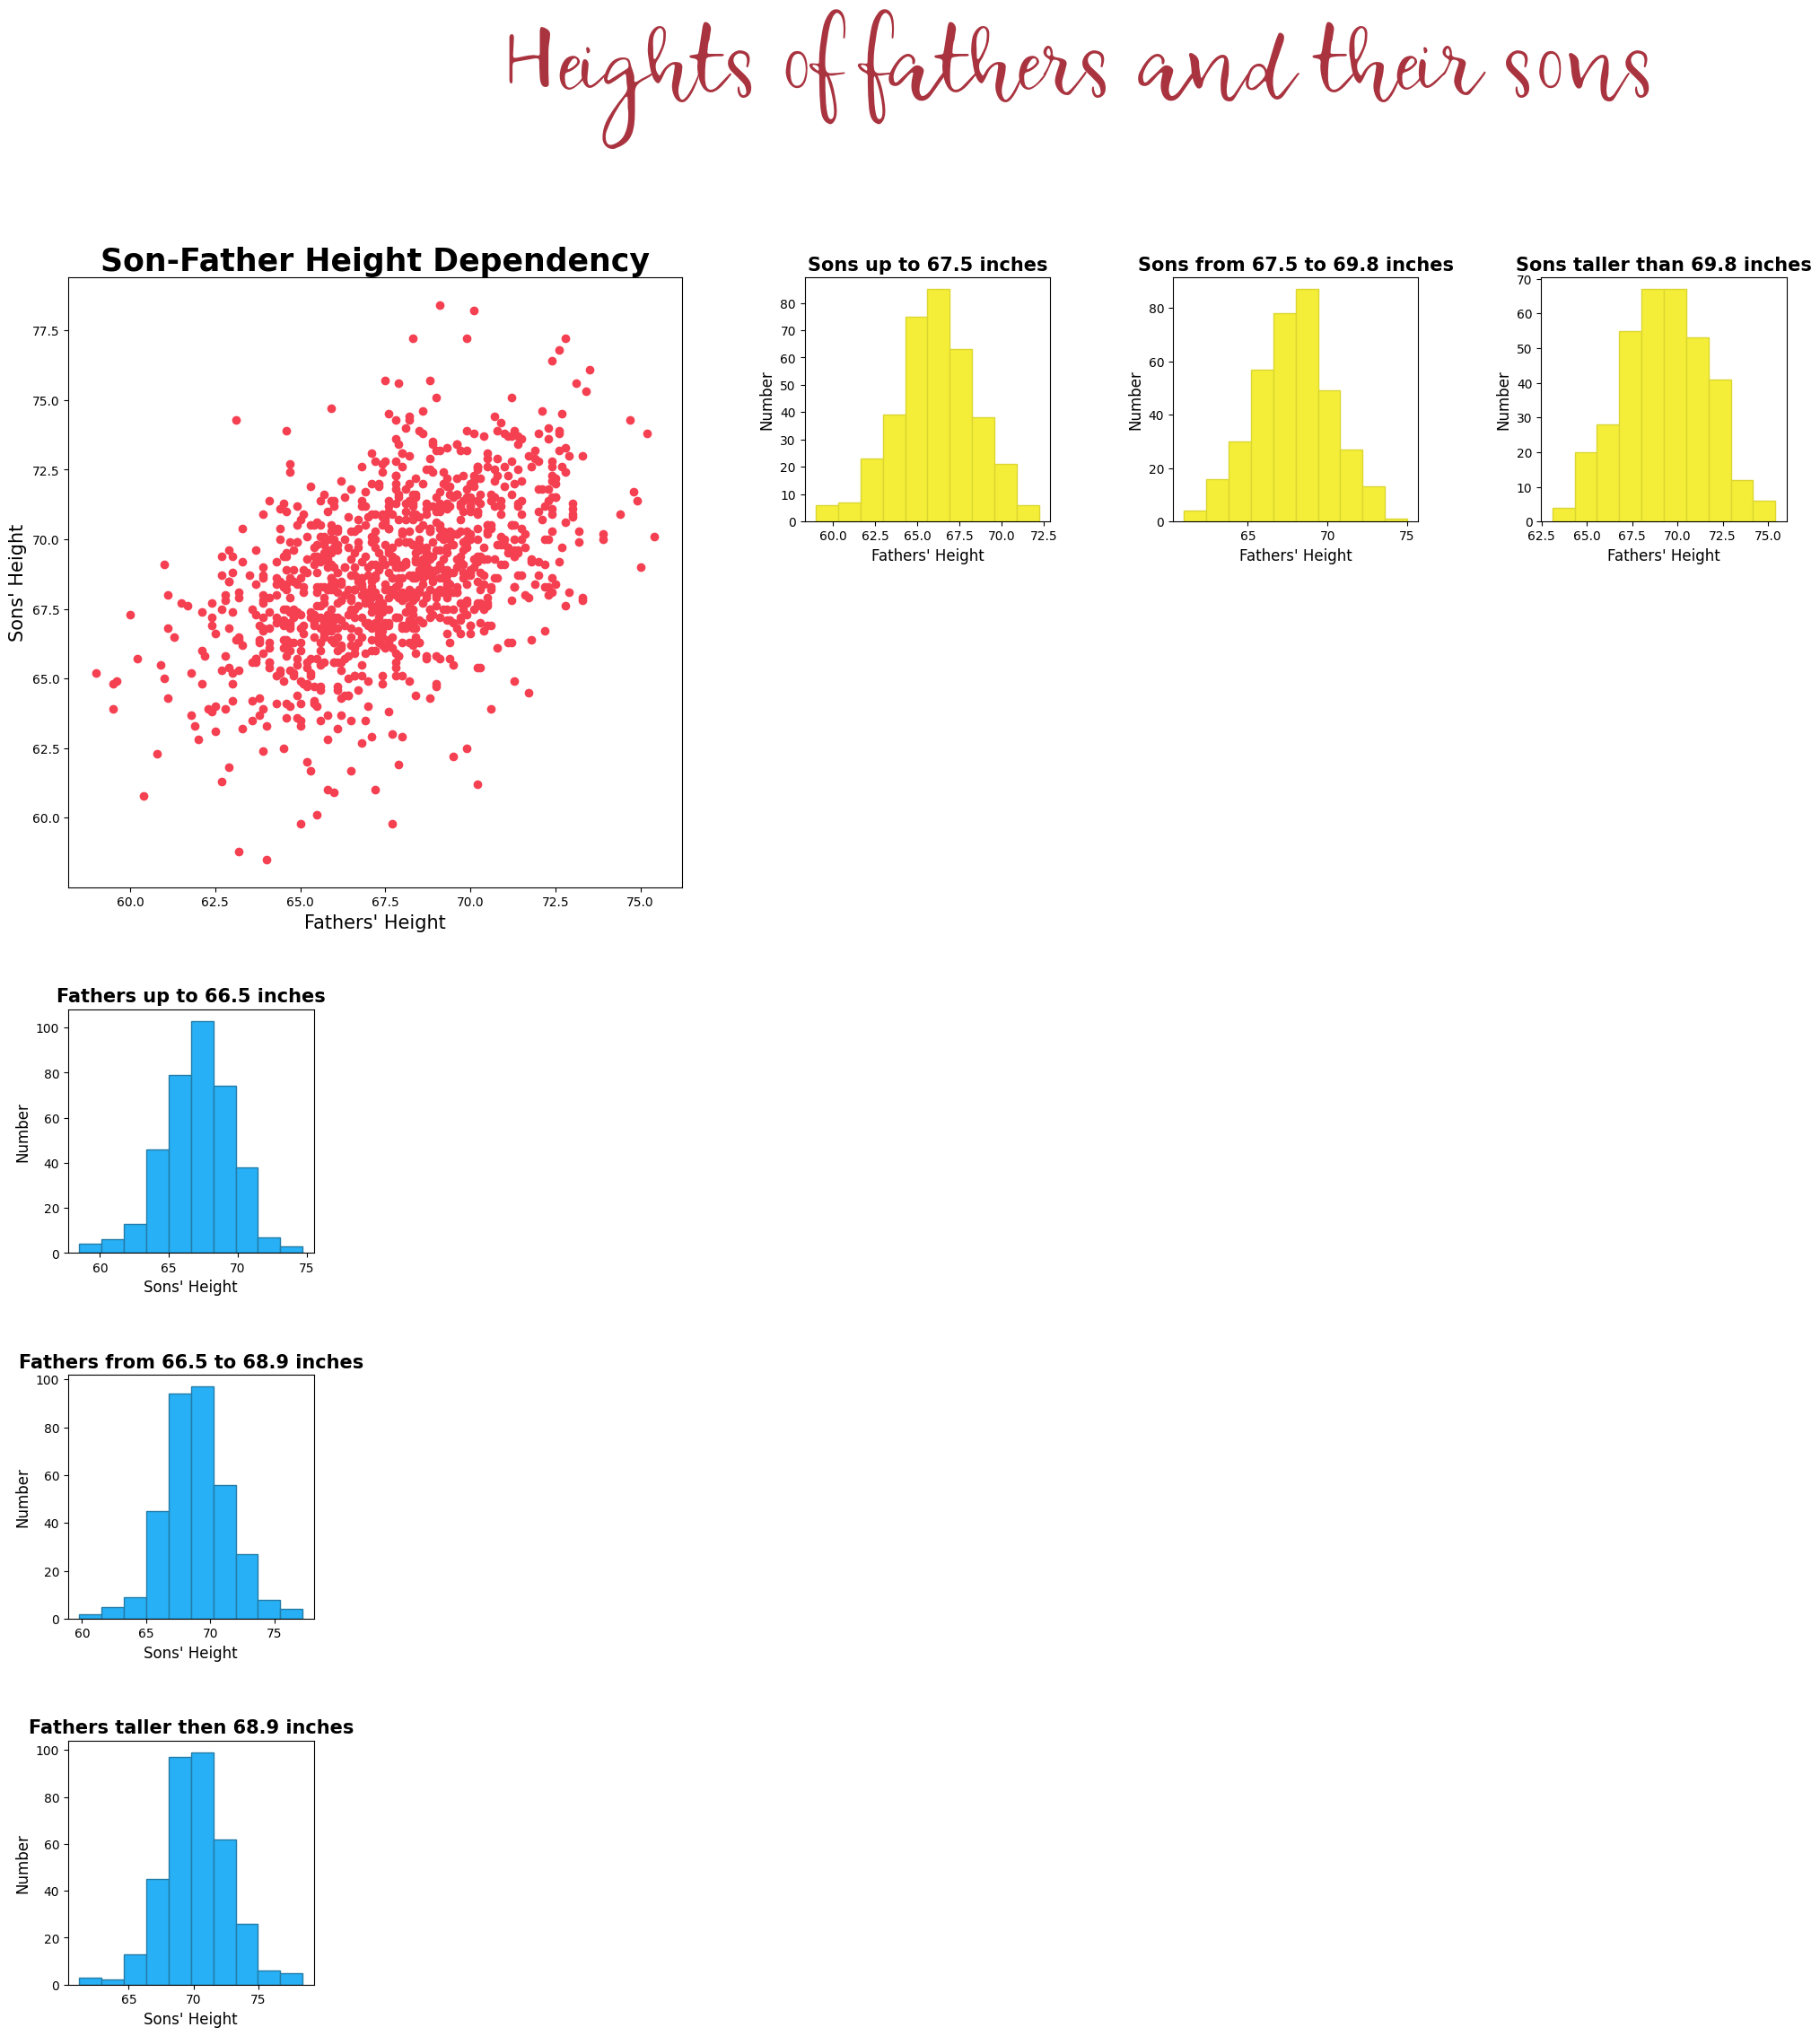

In [7]:
fig = plt.figure(figsize=(30, 30))
gs = fig.add_gridspec(6,6)
gs.update(wspace=0.5, hspace=0.5)
fig.suptitle("Heights of fathers and their sons", fontproperties=prop, fontsize=70, color="#A93440")

#scatter_plot
ax_scat = fig.add_subplot(gs[0:2, 0:2])
x_scat = data.Father
y_scat = data.Son
ax_scat.set_title("Son-Father Height Dependency", fontsize=25, fontweight='bold')
ax_scat.set_xlabel("Fathers' Height", fontsize=15)
ax_scat.set_ylabel("Sons' Height", fontsize=15)
ax_scat.scatter(x_scat, y_scat, color="#F54052")

#hist_plot for height of sons of fathers lower than 66.5 inches
ax_x_1 = fig.add_subplot(gs[2, 0])
y_1 = data[data['Father']<=66.5].Son
ax_x_1.set_title("Fathers up to 66.5 inches", fontsize=15, fontweight='bold')
ax_x_1.set_xlabel("Sons' Height", fontsize=12)
ax_x_1.set_ylabel("Number", fontsize=12)
ax_x_1.hist(y_1, bins=10, color="#27B0F5", edgecolor = "#237CA8")

#hist_plot for height of sons of fathers taller than 66.5 inches and lower than 68.9 inches
ax_x_2 = fig.add_subplot(gs[3, 0])
y_2 = data[(data['Father']>66.5) & (data['Father']<=68.9)].Son
ax_x_2.set_title("Fathers from 66.5 to 68.9 inches", fontsize=15, fontweight='bold')
ax_x_2.set_xlabel("Sons' Height", fontsize=12)
ax_x_2.set_ylabel("Number", fontsize=12)
ax_x_2.hist(y_2, bins=10, color="#27B0F5", edgecolor = "#237CA8")

#hist_plot for height of sons of fathers taller than 68.9 inches
ax_x_3 = fig.add_subplot(gs[4, 0])
y_3 = data[data['Father']>68.9].Son
ax_x_3.set_title("Fathers taller then 68.9 inches", fontsize=15, fontweight='bold')
ax_x_3.set_xlabel("Sons' Height", fontsize=12)
ax_x_3.set_ylabel("Number", fontsize=12)
ax_x_3.hist(y_3, bins=10, color="#27B0F5", edgecolor = "#237CA8")

#hist_plot for height of fathers of sons lower than 67.5 inches
ax_y_1 = fig.add_subplot(gs[0, 2])
x_1 = data[data['Son']<=67.5].Father
ax_y_1.set_title("Sons up to 67.5 inches", fontsize=15, fontweight='bold')
ax_y_1.set_xlabel("Fathers' Height", fontsize=12)
ax_y_1.set_ylabel("Number", fontsize=12)
ax_y_1.hist(x_1, bins=10, color="#F5EE38", edgecolor = "#DBD632")

#hist_plot for height of fathers of sons taller than 67.5 inches and lower than 69.8 inches
ax_y_2 = fig.add_subplot(gs[0, 3])
x_2 = data[(data['Son']>67.5) & (data['Son']<=69.8)].Father
ax_y_2.set_title("Sons from 67.5 to 69.8 inches", fontsize=15, fontweight='bold')
ax_y_2.set_xlabel("Fathers' Height", fontsize=12)
ax_y_2.set_ylabel("Number", fontsize=12)
ax_y_2.hist(x_2, bins=10, color="#F5EE38", edgecolor = "#DBD632")

#hist_plot for height of fathers of sons taller than 69.8 inches
ax_y_3 = fig.add_subplot(gs[0, 4])
x_3 = data[data['Son']>69.8].Father
ax_y_3.set_title("Sons taller than 69.8 inches", fontsize=15, fontweight='bold')
ax_y_3.set_xlabel("Fathers' Height", fontsize=12)
ax_y_3.set_ylabel("Number", fontsize=12)
ax_y_3.hist(x_3, bins=10, color="#F5EE38", edgecolor = "#DBD632")

plt.show()